In [1]:
import numpy as np
from my_model import double_Layer_MLP
from utils import load_mnist, to_1_dim, accuracy
import itertools
import tqdm

x_train_path='./data/MNIST/train-images-idx3-ubyte.gz'
y_train_path='./data/MNIST/train-labels-idx1-ubyte.gz'
x_test_path='./data/MNIST/t10k-images-idx3-ubyte.gz'
y_test_path='./data/MNIST/t10k-labels-idx1-ubyte.gz'
(x_train,y_train),(x_test,y_test)=load_mnist(x_train_path, y_train_path, x_test_path, y_test_path)
x_val = x_train[50000:60000, :]
y_val = y_train[50000:60000, :]
x_train = x_train[:50000, :]
y_train = y_train[:50000, :]




In [2]:
alpha_l=[0.01*i for i in range(5)] # 正则化强度
hidden_l=[28,32,64] # 隐藏层大小
lr=[0.005*i for i in range(1,6)] # 学习率大小

model_found={}

for a_h_e in tqdm.tqdm(itertools.product(alpha_l,hidden_l,lr)):
    alpha,hidden,lr=a_h_e
    clf = double_Layer_MLP(x_train, hidden, y_train,x_val, y_val)
    out=clf.train(1, lr, alpha)
    model_found[(alpha,hidden,lr)]=out
    


75it [36:06, 28.88s/it]


In [3]:
best_model=sorted(model_found.items(),key=lambda x:x[1][0][-1],reverse=True)[0]
name,(acc_val,loss_train,loss_val,W1,W2)=best_model
np.save('W_1.npy', W1)
np.save('W_2.npy',W2)
print(name)

(0.01, 28, 0.01)


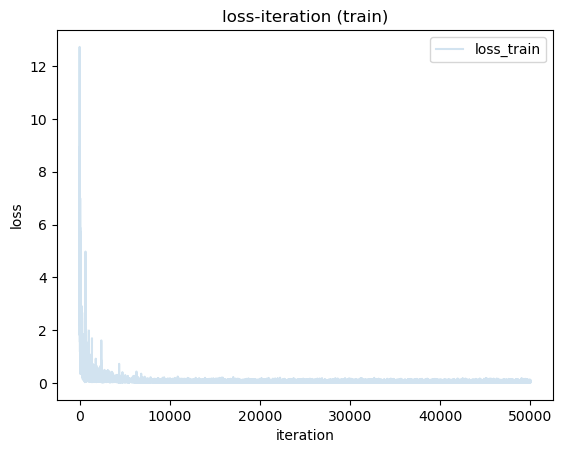

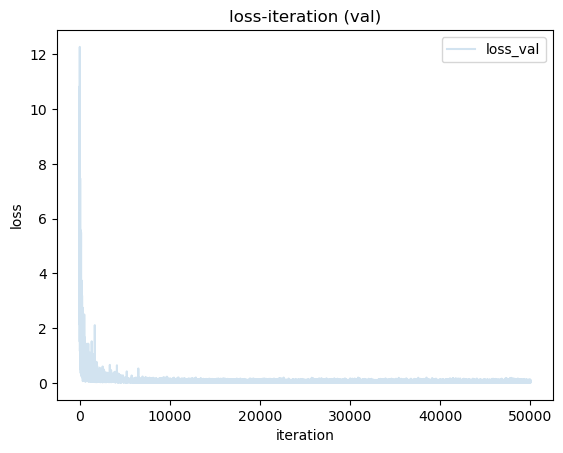

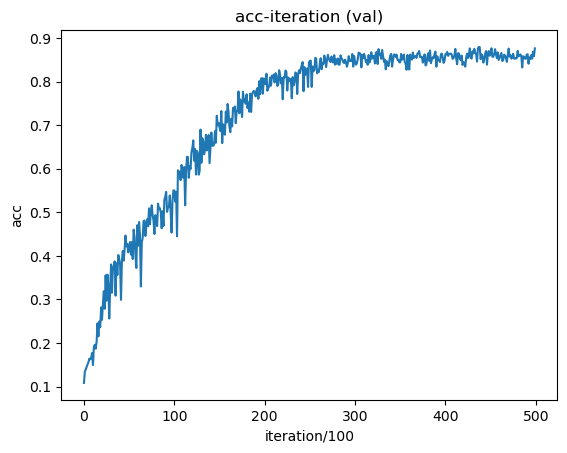

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('loss-iteration (train)')
plt.plot(loss_train,alpha=0.2,label='loss_train')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure()
plt.title('loss-iteration (val)')
plt.plot(loss_val,alpha=0.2,label='loss_val')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure()
plt.title('acc-iteration (val)')
plt.plot(acc_val,alpha=1)
plt.xlabel('iteration/100')
plt.ylabel('acc')
plt.show()

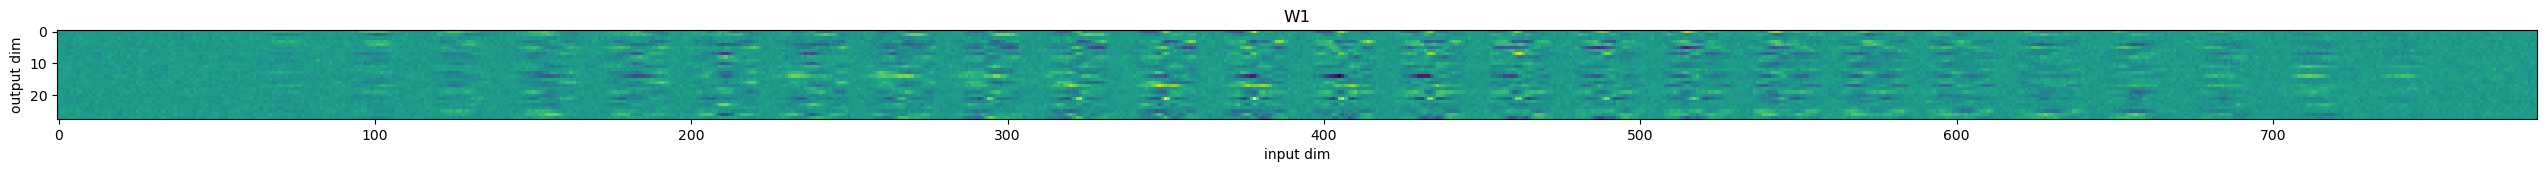

Text(0, 0.5, 'output dim')

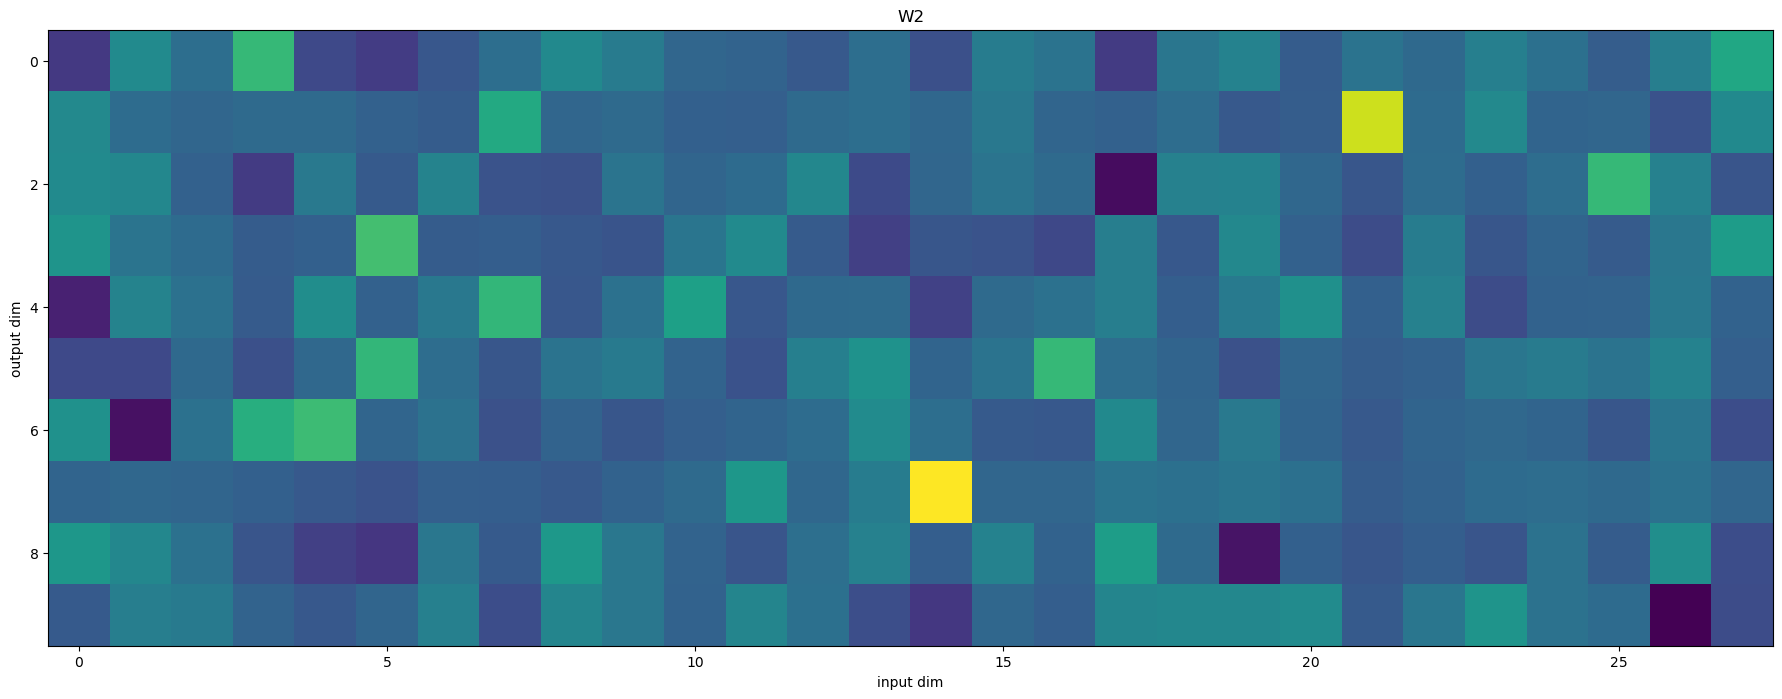

In [5]:
W1 = np.load('W_1.npy')
W2 = np.load('W_2.npy')
plt.figure(figsize=(32,8))
plt.title('W1')
plt.imshow(W1.T)
plt.xlabel('input dim')
plt.ylabel('output dim')
plt.show()

plt.figure(figsize=(32,8))
plt.title('W2')
plt.imshow(W2.T)
plt.xlabel('input dim')
plt.ylabel('output dim')

In [6]:
from utils import load_mnist, to_1_dim, accuracy
Z = x_test @ W1
H = 1 / (1 + np.exp(-Z))
Y_pred = H @ W2
acc = accuracy(to_1_dim(Y_pred), to_1_dim(y_test))
print(acc)

0.8617
